In [1]:
#library(magrittr)
library(clusterProfiler)



clusterProfiler v3.17.0  For help: https://guangchuangyu.github.io/software/clusterProfiler

If you use clusterProfiler in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Yanyan Han, Qing-Yu He. clusterProfiler: an R package for comparing biological themes among gene clusters. OMICS: A Journal of Integrative Biology. 2012, 16(5):284-287.


Attaching package: ‘clusterProfiler’


The following object is masked from ‘package:stats’:

    filter




In [2]:
data(gcSample)
lapply(gcSample, head)
ck <- compareCluster(geneCluster = gcSample, fun = "enrichKEGG")
head(as.data.frame(ck))

$X1
[1] "4597"  "7111"  "5266"  "2175"  "755"   "23046"

$X2
[1] "23450" "5160"  "7126"  "26118" "8452"  "3675" 

$X3
[1] "894"   "7057"  "22906" "3339"  "10449" "6566" 

$X4
[1] "5573"  "7453"  "5245"  "23450" "6500"  "4926" 

$X5
[1] "5982" "7318" "6352" "2101" "8882" "7803"

$X6
[1] "5337"  "9295"  "4035"  "811"   "23365" "4629" 

$X7
[1] "2621" "2665" "5690" "3608" "3550" "533" 

$X8
[1] "2665" "4735" "1327" "3192" "5573" "9528"

Cluster,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
<fct>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
X2,hsa04110,Cell cycle,18/378,124/8039,1.761477e-05,0.005213973,0.004857969,991/1869/890/1871/701/990/10926/9088/8317/9700/9134/1029/2810/699/11200/23594/8555/4173,18
X2,hsa05169,Epstein-Barr virus infection,23/378,201/8039,6.507677e-05,0.009631363,0.008973745,4067/3383/7128/1869/890/1871/578/864/637/9641/6891/355/9134/5971/916/956/6850/7187/3551/919/4734/958/6772,23
X2,hsa05340,Primary immunodeficiency,8/378,38/8039,3.131177e-04,0.030894284,0.028784859,100/6891/3932/973/916/925/958/64421,8
X2,hsa05166,Human T-cell leukemia virus 1 infection,22/378,219/8039,6.041053e-04,0.044703791,0.041651470,3383/991/1869/890/1871/113/701/9700/3932/9134/5971/916/4487/3600/1029/3551/8498/4488/11200/4776/4214/958,22
X3,hsa04512,ECM-receptor interaction,9/186,88/8039,1.852765e-04,0.045016496,0.042080041,7057/3339/1299/3695/1101/3679/3910/3696/3693,9
X3,hsa04060,Cytokine-cytokine receptor interaction,17/186,294/8039,4.451139e-04,0.045016496,0.042080041,2919/4982/3977/6375/8200/608/8792/3568/2057/1438/8718/655/652/10220/50615/51561/7042,17


# 11.1 Formula interface of compareCluster

In [3]:
data(geneList, package="DOSE")

In [4]:
mydf <- data.frame(Entrez=names(geneList), FC=geneList)
mydf <- mydf[abs(mydf$FC) > 1,]
mydf$group <- "upregulated"
mydf$group[mydf$FC < 0] <- "downregulated"
mydf$othergroup <- "A"
mydf$othergroup[abs(mydf$FC) > 2] <- "B"

In [5]:
formula_res <- compareCluster(Entrez~group+othergroup, data=mydf, fun="enrichKEGG")

In [6]:
head(as.data.frame(formula_res))

Cluster,group,othergroup,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
downregulated.A,downregulated,A,hsa04974,Protein digestion and absorption,15/310,95/8038,2.988684e-06,8.069448e-04,7.518900e-04,1281/50509/1290/477/1294/1360/1289/1292/23428/1359/1300/1287/6505/2006/7373,15
downregulated.A,downregulated,A,hsa04510,Focal adhesion,20/310,199/8038,7.855907e-05,1.060547e-02,9.881904e-03,55742/2317/7058/25759/56034/3693/3480/5159/857/1292/3908/3909/63923/3913/1287/3679/7060/3479/10451/80310,20
downregulated.A,downregulated,A,hsa04151,PI3K-Akt signaling pathway,28/310,354/8038,2.251014e-04,2.025913e-02,1.887693e-02,55970/5618/7058/10161/56034/3693/4254/3480/4908/5159/1292/3908/2690/3909/8817/9223/4915/3551/2791/63923/3913/9863/3667/1287/3679/7060/3479/80310,28
downregulated.A,downregulated,A,hsa04512,ECM-receptor interaction,11/310,88/8038,5.301333e-04,3.578400e-02,3.334259e-02,7058/3693/3339/1292/3908/3909/63923/3913/1287/3679/7060,11
downregulated.B,downregulated,B,hsa03320,PPAR signaling pathway,5/41,77/8038,4.049956e-05,6.074933e-03,5.584676e-03,9370/5105/2167/3158/5346,5
upregulated.A,upregulated,A,hsa04110,Cell cycle,20/219,124/8038,1.054060e-10,2.529745e-08,2.263456e-08,4171/993/990/5347/701/9700/898/23594/4998/9134/4175/4173/10926/6502/994/699/4609/5111/1869/1029,20


# 11.2 Visualization of profile comparison

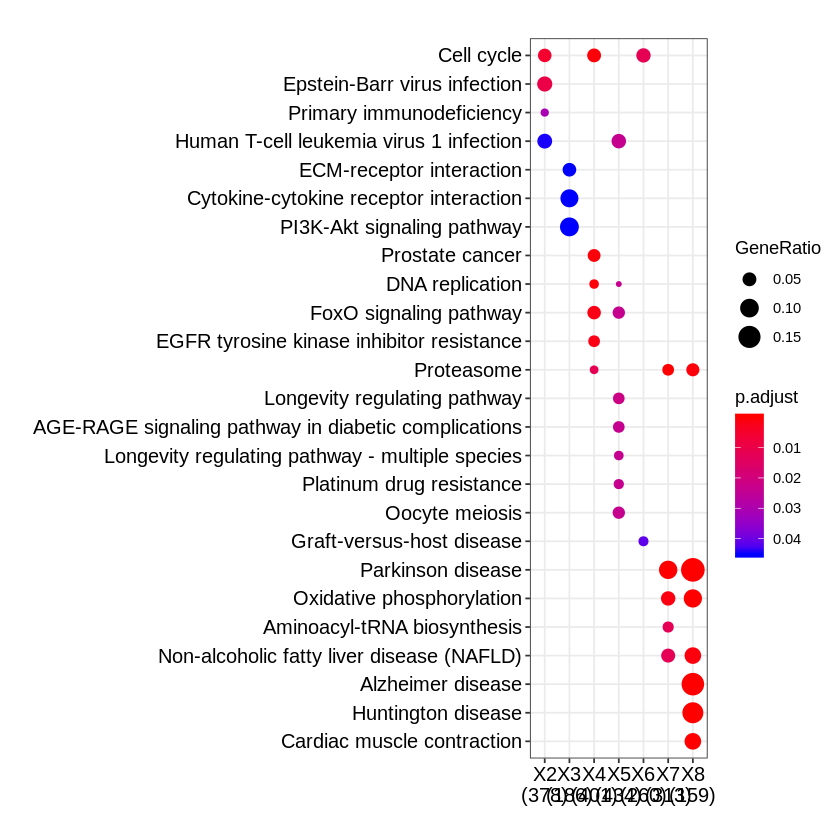

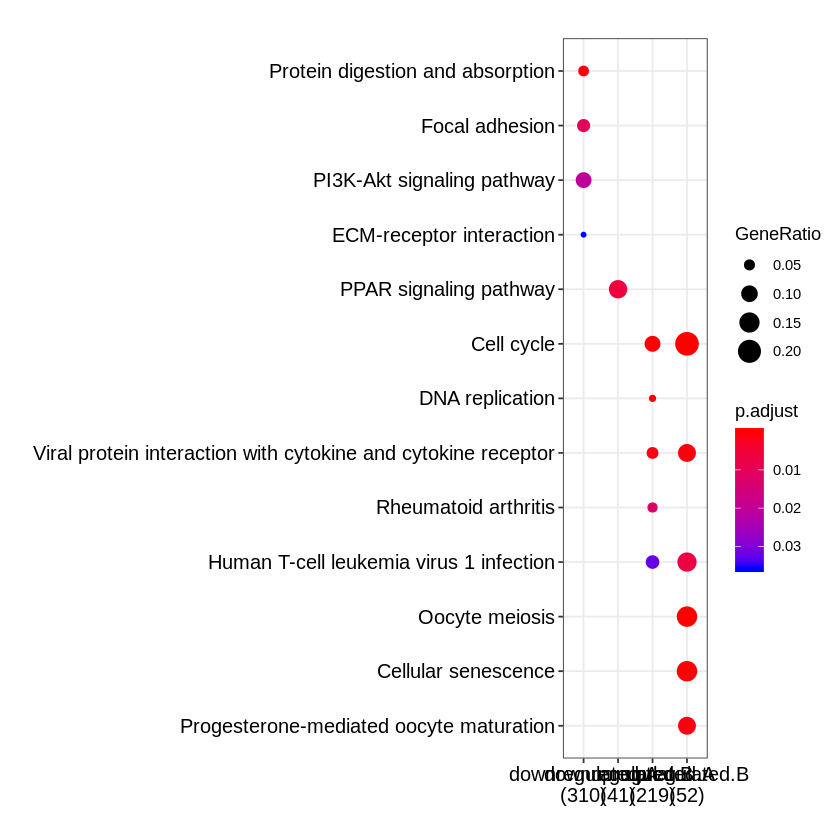

In [7]:
dotplot(ck)
dotplot(formula_res)

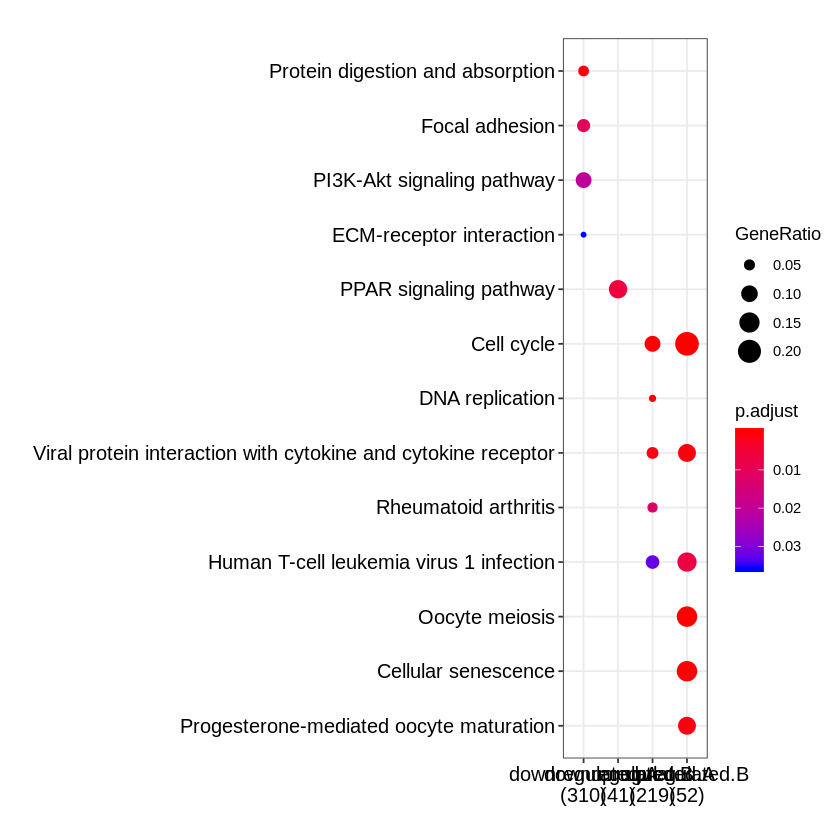

In [8]:
dotplot(formula_res)

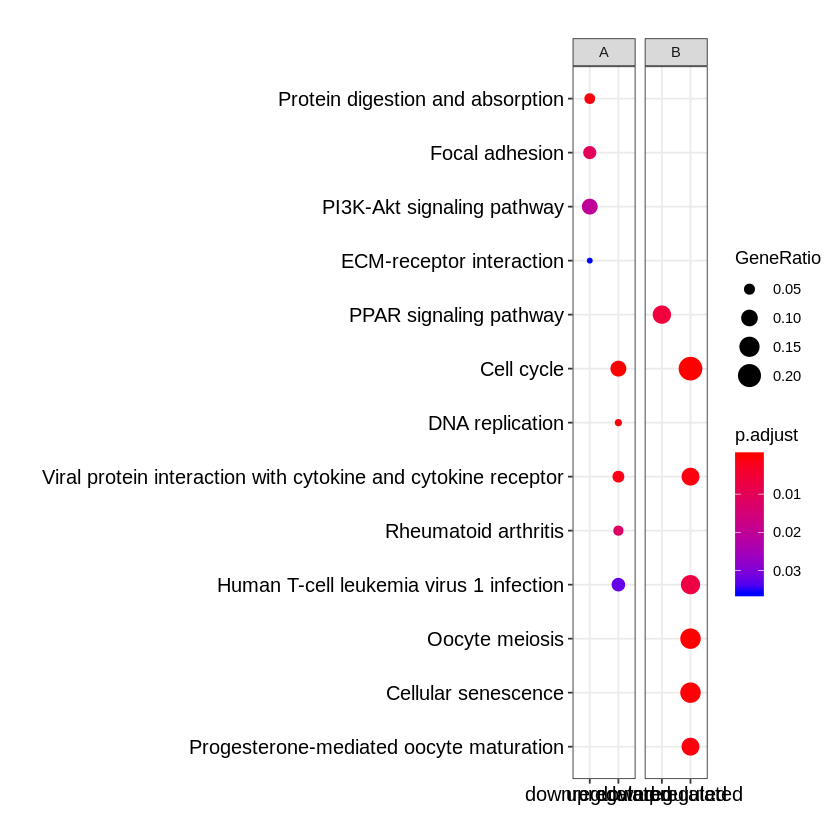

In [9]:
dotplot(formula_res, x=~group) + ggplot2::facet_grid(~othergroup)